# pyStrat_draft

This notebook is a draft/testing stage for pyStrat.

Note that the templates contain 'fake' data, and is only meant for illustration purposes only.

## Import Modules

Core:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
% matplotlib inline

pyStrat:

In [2]:
from pyStrat import read_data
from pyStrat import read_formatting
from pyStrat import integrity_check
from pyStrat import initiate_figure
from pyStrat import add_data_axis
from pyStrat import scatter_variance
from pyStrat import lowess_fit

## Import Data and Formatting

They must follow the template formatting. See the docstrings of `read_data` and `formatting` for more details.

In [3]:
data = read_data('data_template.csv')
formatting = read_formatting('formatting_template.csv')

## Integrity Check

In [4]:
integrity_check(data, formatting)

Colour and width check passed.


## Calculate Variance and a Lowess Fit

In [5]:
interval = 100

lowess_all = lowess_fit(data['CHEM_d13C'], data['CHEM_HEIGHT'], frac=0.1)
variances, strat_height_mids = scatter_variance(data['CHEM_HEIGHT'], data['CHEM_d13C'], interval, mode='standard')
norm_variances, strat_height_mids, lowess_norm, norm_d13C, heights = scatter_variance(data['CHEM_HEIGHT'], data['CHEM_d13C'],\
                                                                                      interval, mode='normalized', frac=1)

## Plot

### Basic Version

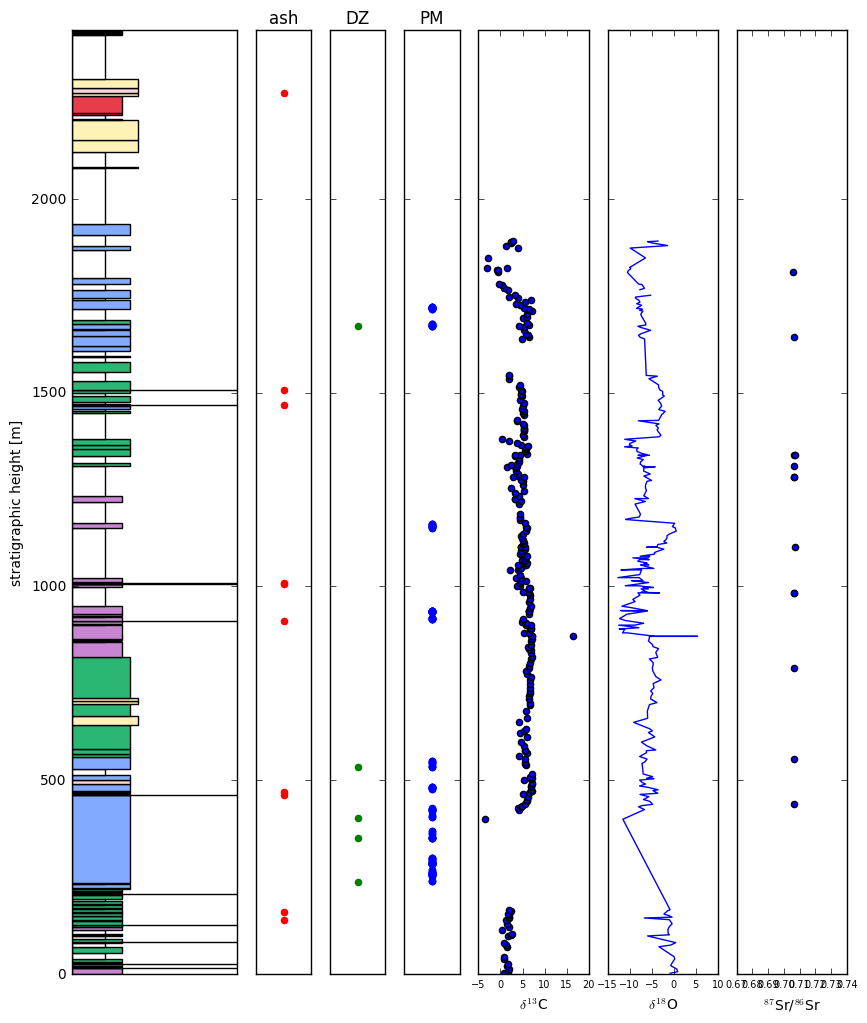

In [6]:
# the backbone of the plot
strat_ratio = 0.005
figwidth = 10
width_ratios = [3,1,1,1,2,2,2]
fig, axs = initiate_figure(data, formatting, strat_ratio, figwidth, width_ratios)

# additional data axes
# note that the added data axes can pull data from anywhere - they do not have to come from the data.csv
add_data_axis(fig, axs, 1, np.zeros(len(data['ASH_HEIGHT'])), data['ASH_HEIGHT'], 'scatter', color='red')
add_data_axis(fig, axs, 2, np.zeros(len(data['DZ_HEIGHT'])), data['DZ_HEIGHT'], 'scatter', color='green')
add_data_axis(fig, axs, 3, np.zeros(len(data['PM_HEIGHT'])), data['PM_HEIGHT'], 'scatter', color='blue')
add_data_axis(fig, axs, 4, data['CHEM_d13C'], data['CHEM_HEIGHT'], 'scatter')
add_data_axis(fig, axs, 5, data['CHEM_d18O'], data['CHEM_HEIGHT'], 'plot')
add_data_axis(fig, axs, 6, data['CHEM_87Sr/86Sr'], data['CHEM_HEIGHT'], 'scatter')

# for now make style changes using the axis handles, in the standard matplotlib manner
axs[1].set_xticks([])
axs[1].set_title('ash')

axs[2].set_xticks([])
axs[2].set_title('DZ')

axs[3].set_xticks([])
axs[3].set_title('PM')

axs[4].set_xlabel('$\delta^{13}$C')

axs[5].set_xlabel('$\delta^{18}$O')

axs[6].set_xlabel('$^{87}$Sr/$^{86}$Sr')

for i in range(1,len(axs)):
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(7)

plt.show(fig)

### Lowess Fit and Variance Exploration

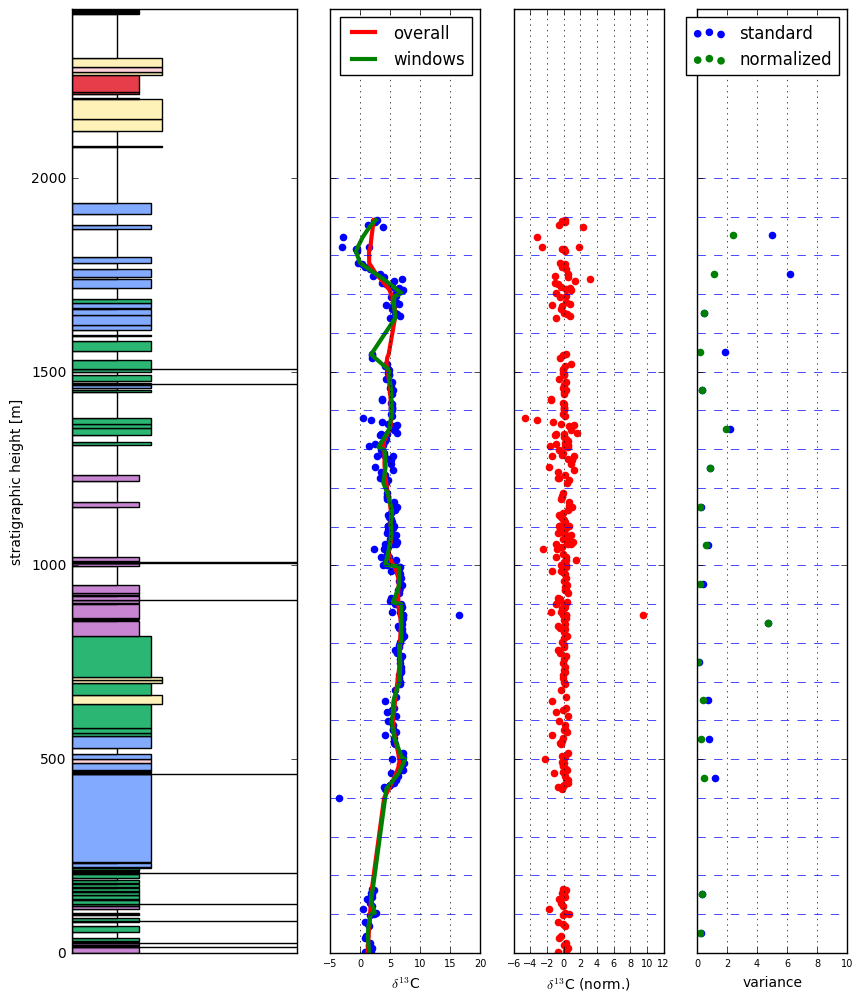

In [7]:
# the backbone of the plot
strat_ratio = 0.005
figwidth = 10
width_ratios = [3,2,2,2]
fig, axs = initiate_figure(data, formatting, strat_ratio, figwidth, width_ratios)

# additional data axes
# note that the added data axes can pull data from anywhere - they do not have to come from the data.csv
add_data_axis(fig, axs, 1, data['CHEM_d13C'], data['CHEM_HEIGHT'], 'scatter', color='blue', label='_nolegend_')
add_data_axis(fig, axs, 1, lowess_all[:,1], lowess_all[:,0], 'plot', color='red', linewidth=3, label='overall')
add_data_axis(fig, axs, 1, lowess_norm[:,1], lowess_norm[:,0], 'plot', color='green', linewidth=3, label='windows')
add_data_axis(fig, axs, 2, norm_d13C, heights, 'scatter', color='red')
add_data_axis(fig, axs, 3, variances, strat_height_mids, 'scatter', color = 'blue', label='standard')
add_data_axis(fig, axs, 3, norm_variances, strat_height_mids, 'scatter', color='green', label='normalized')

# for now make style changes using the axis handles, in the standard matplotlib manner
axs[1].set_xlabel('$\delta^{13}$C')
axs[1].legend()

axs[2].set_xlabel('$\delta^{13}$C (norm.)')

axs[3].set_xlabel('variance')
axs[3].set_xlim(0,10)
axs[3].legend()

for i in range(1,len(axs)):
    axs[i].xaxis.grid()
    for window_boundary in np.arange(0,2100,interval):
        axs[i].axhline(window_boundary, linestyle='--', linewidth=0.5)
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(7)

plt.show(fig)

In [8]:
print(np.mean(norm_d13C))

-0.0414982429067
